In [3]:
import numpy as np
import pandas as pd
from openbb import obb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
obb.user.preferences.output_type = "dataframe"

In [5]:
# Retrieving data for gold mining stocks and healthcare stocks, then calculate their daily returns
symbols = ["NEM", "RGLD", "SSRM", "CDE", "LLY", "UNH", "JNJ", "MRK"]

data = obb.equity.price.historical(
    symbols,
    start_date="2022-01-01",
    end_date="2024-12-31",
    provider="yfinance",
).pivot(columns="symbol", values="close")

returns = data.pct_change().dropna()

In [6]:
# Setting the PCA to use 3 components and fit the model
pca = PCA(n_components=3)
pca.fit(returns)

PCA(n_components=3)

In [7]:
# Extract the explained variance ratio for each component & extract the principal components
pct = pca.explained_variance_ratio_
pca_components = pca.components_

(0.0, 100.0)

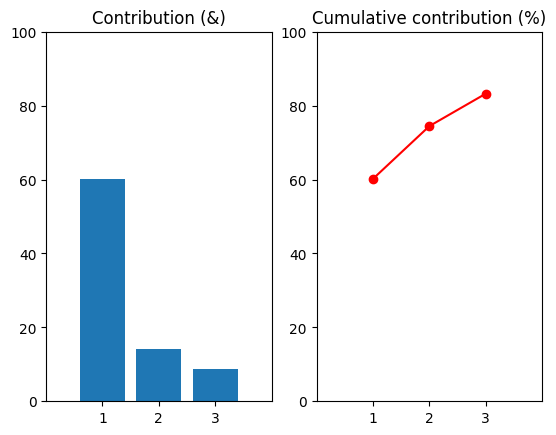

In [8]:
cum_pct = np.cumsum(pct)
x = np.arange(1, len(pct) + 1, 1)
plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title("Contribution (&)")
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])
plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, "ro-")
plt.title("Cumulative contribution (%)")
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

In [9]:
x = np.asarray(returns)
factor_returns = x.dot(pca_components.T)
factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"],
    index=returns.index,
    data=factor_returns
)

In [10]:
display(factor_returns)

,f1,f2,f3
date,,,
2022-01-04,0.029336,-0.009044,-0.032035
2022-01-05,-0.045653,0.002852,-0.001663
2022-01-06,-0.074543,-0.000901,-0.020816
2022-01-07,0.009047,-0.004298,0.003391
2022-01-10,0.037934,0.007668,0.017916
...,...,...,...
2024-12-24,0.002653,0.004929,0.001312
2024-12-26,-0.001863,-0.023997,0.004698
2024-12-27,-0.016113,0.020406,-0.012579


In [11]:
factor_exposures = pd.DataFrame(
    index=["f1", "f2", "f3"],
    columns=returns.columns,
    data=pca_components
).T

In [12]:
display(factor_exposures)

,f1,f2,f3
symbol,,,
CDE,0.759854,-0.578803,-0.132649
JNJ,0.018860,0.018351,0.249888
LLY,0.030110,-0.032066,0.744660
MRK,0.036403,0.004413,0.367832
NEM,0.309071,0.072573,0.169409
RGLD,0.277876,0.064310,0.123509
SSRM,0.495769,0.808515,-0.086392
UNH,0.038841,-0.022463,0.422757


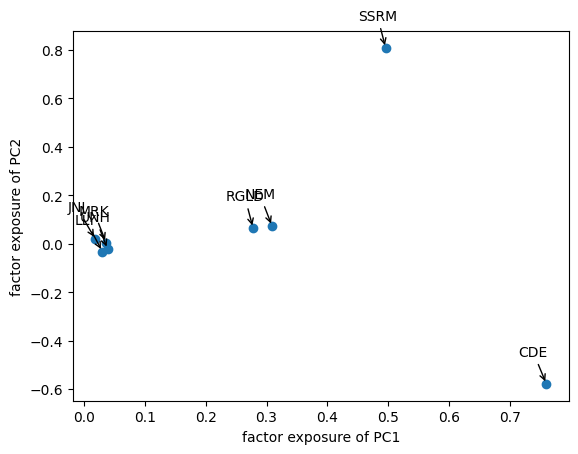

In [33]:
labels = factor_exposures.index
data = factor_exposures.values
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("factor exposure of PC1")
plt.ylabel("factor exposure of PC2")
for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-20, 20),
        textcoords="offset points",
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="arc3,rad=0"
        ),
    )